# 模块7-机器学习基础-基础篇-04-从线性回归到神经网络之逻辑回归篇

![pic](./images/image-20241118120420276.png)

![pic](./images/image-20241118120436226.png)

![pic](./images/image-20241118120450508.png)

## 名为回归的分类算法

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/heart.csv')
data['target'].value_counts(dropna=False)

target
1    165
0    138
Name: count, dtype: int64

In [3]:
data['target'].isna().sum()

0

机器学习的分类过程,也就是确定某一个事物,隶属于某一个类别的可能性大小的过程

1. 找到sigmoid函数: $$g(z) = \frac{1}{1+e^{-z}}$$

2. 找到线性回归模型店中间值: $$z(x)=w_1 x_1+w_2 x_2+\ldots+w_{n-1} x_{n-1}+w_n x_n+b=W^TX$$

3. 将1和2组合起来,将函数表示为假设函数形式:
$$g(x) = \frac{1}{1+e^{-(w_1 x_1+w_2 x_2+\ldots+w_{n-1} x_{n-1}+w_n x_n+b)}}$$


最终得到逻辑回归的假设函数
$$h(x) = \frac{1}{1+e^{-(W^TX)}}$$

In [4]:
def sigmoid(z):
    y_hat = 1 / (1 + np.exp(-z))
    return y_hat

逻辑回归的损失函数

$$L(w,b) = \frac{1}{N} \sum_{(x,y) \in D} Loss(h(x), y ) = \frac{1}{N} Loss(y^`,y)$$

$$
y=\left\{\begin{array}{l}
1, \operatorname{Loss}(h(x), y)=-\log (h(x)) \\
0, \operatorname{Loss}(h(x), y)=-\log (1-h(x))
\end{array}\right.
$$

$$L(w,b) = \frac{1}{N} \sum_{(x,y) \in D} [y*log(h(x)) + (1-y) \times log(1-h(x))]$$

In [5]:
def loss_fuction(X,y,w,b):
    y_hat = sigmoid(np.dot(X,w) +b) # 假设函数
    loss = - (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    cost = np.sum(loss) / len(X)
    return cost

### 逻辑回归的梯度下降

$$\text{梯度} = h^{\prime}(x)=\frac{\partial}{\partial w} L(w, b)=\frac{\partial}{\partial w}\left\{-\frac{1}{N} \sum_{(x, y) \in D}[y * \log (h(x))+(1-y) * \log (1-h(x))]\right\}$$

$$\text{梯度} = \frac{1}{N} \sum_{i=1}^N\left(y^{(i)}-h\left(x^{(i)}\right)\right) \cdot x^{(i)}$$

$$\frac{1}{N} \sum_{i=1}^N\left(y^{(i)}-h\left(x^{(i)}\right)\right) \cdot x^{(i)}$$


$$w=w-\frac{\alpha}{N} \sum_{j=1}^N\left(y^{(i)}-\left(w \cdot x^{(i)}\right)\right) \cdot x^{(i)}$$

In [6]:
def gradient_descent(X,y,w,b,lr, iters): # 定义逻辑回归函数的梯度下降算法
    l_history = np.zeros(iters) # 记录损失
    w_history = np.zeros(iters) # 记录权重
    b_history = np.zeros(iters) # 记录偏置
    for i in range(iters):  # 迭代计算
        y_hat = sigmoid(np.dot(X,w) + b) # 使用sigmoid函数+线性函数(wx + b)计算得到y`
        deriivative_w = np.dot(X.T, (y_hat -y)) / X.shape[0]  # 给权重进行求导
        deriivative_b = np.sum(y_hat - y) / X.shape[0]  # 给偏置进行求导
        w = w - lr * deriivative_w  # 更新权重向量,lr是学习速率
        b = b - lr * deriivative_b  # 更新偏置,
        l_history[i] = loss_fuction(X, y, w, b) # 梯度下降过程中的损失,
        print(f'当前是第{i+1}轮, 当前训练集损失为: {l_history[i]}')
        w_history[i] = w  # 梯度下降过程中的权重历史,
        b_history[i] = b  # 梯度下降算法中的偏置历史
    return l_history,w_history, b_history  

##  通过逻辑回归解决二元分类问题

In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
print('Python version:', sys.version)
print('Pandas version:', pd.__version__)
print('Numpy version:', np.__version__)
print('Matplotlib version:', matplotlib.__version__)

Python version: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
Pandas version: 2.2.2
Numpy version: 1.26.4
Matplotlib version: 3.8.4


In [8]:
data = pd.read_csv('./data/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html()

                                             |                                                                …

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
#  需要使用指定版本的python来进行实现
# from dataprep.eda import create_report
# import pandas as pd # 导入Pandas数据处理工具箱
# data = pd.read_csv('./data/heart.csv')
# report = create_report(data)
# report.save('report.html')

In [11]:
# 这个步骤是必须的,如果某个类别的比例特别第 ,那这样的数据通过逻辑回归做分类是不合适的.
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [12]:
# 年龄/最大心率,是否患病之间的关系

In [13]:
plt.rcParams['font.sans-serif'] = 'Times New Roman'
import matplotx

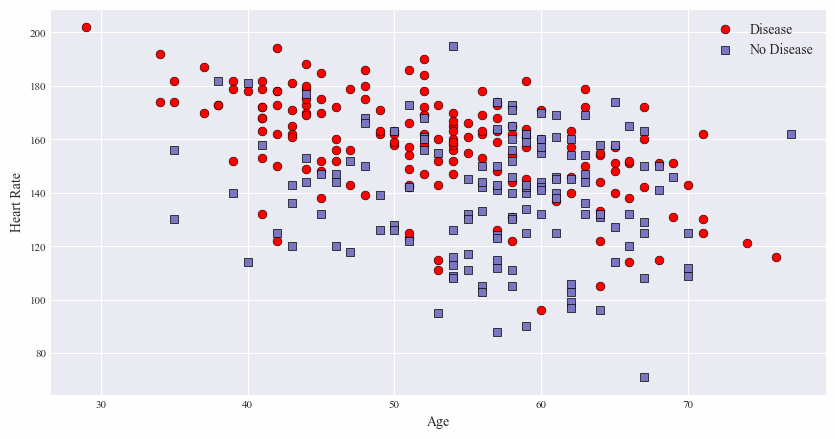

In [14]:
with plt.style.context(matplotx.styles.pitaya_smoothie['light']):
    plt.figure(figsize=(10,5), dpi=100)
    plt.scatter(x = data[data['target'] == 1]['age'],c='red',marker='o',
                s=40,linewidths=.4,edgecolors='black',
               y = data[data['target'] == 1]['thalach'],label='Disease',
               )
    plt.scatter(x = data[data['target'] == 0]['age'],marker='s',
                s=40,linewidths=.5,edgecolors='black',
               y = data[data['target'] == 0]['thalach'],label='No Disease' ,
               )
    plt.legend()
    plt.xlabel('Age')
    plt.ylabel('Heart Rate')
plt.show()

## 构建特征集和标签集

In [259]:
X = data.iloc[:,:-1]
y = data['target'].values
y = y.reshape(-1,1)
print(f'特征集形状: {X.shape}')
print(f'标签集形状: {y.shape}')

特征集形状: (303, 13)
标签集形状: (303, 1)


In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1210)

In [73]:
# report = sv.compare([pd.concat([X_train,y_train],axis=1),'训练集'],
#                     [pd.concat([X_test,y_test],axis=1),'验证集'])
# report.show_html()

### 数据归一化

In [261]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)


## 建立逻辑回归模型

### 逻辑函数的定义

In [211]:
# 首先定义一个sigmoid函数,输入Z,返回y`, y_hat
def sigmoid(z):
    y_hat = 1 / (1 + np.exp(-z))
    return y_hat

### 定义损失函数

In [222]:
def loss_function(X,y,w,b):
    y_hat = sigmoid(np.dot(X,w) +b) # 假设函数, sigmoid逻辑函数+线性函数(wX + b)得到的
    loss =  - (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)) # 计算损失
    cost = np.sum(loss) / X.shape[0]  # 整个数据集的平局损失
    return cost   # 返回平均损失

### 梯度下降的实现

In [223]:
# 下面是逻辑回归的损失函数的 Python 实现 ：
def gradient_descent(X, y, w, b, lr, iters) : # 定义逻辑回归梯度下降函数
    l_history = np.zeros(iters) # 初始化记录梯度下降过程中误差值 ( 损失 ) 的数组
    w_history = np.zeros((iters, w.shape[0], w.shape[1])) # 初始化记录梯度下降过程中权重的数组
    b_history = np.zeros(iters) # 初始化记录梯度下降过程中偏置的数组 
    for i in range(iters): # 进行机器训练的迭代
        y_hat = sigmoid(np.dot(X, w) + b) #Sigmoid 逻辑函数 + 线性函数 (wX+b) 得到 y'
        loss = -(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)) # 计算损失
        derivative_w = np.dot(X.T, ((y_hat-y)))/X.shape[0] # 给权重向量求导
        derivative_b = np.sum(y_hat-y)/X.shape[0] # 给偏置求导
        w = w - lr * derivative_w # 更新权重向量 , lr 即学习速率 alpha
        b = b - lr * derivative_b # 更新偏置 , lr 即学习速率 alpha
        l_history[i] = loss_function(X, y, w, b) # 梯度下降过程中的损失
        print (" 轮次 ", i+1 , " 当前轮训练集损失 ：", l_history[i]) 
        w_history[i] = w # 梯度下降过程中权重的历史记录，请注意 w_history 和 w 的形状
        b_history[i] = b # 梯度下降过程中偏置的历史记录
    return l_history, w_history, b_history

### 预测函数的定义

In [224]:
def predict(X, w, b): # 定义预测函数
    z = np.dot(X, w) + b # 这是线性函数
    y_hat = sigmoid(z) # 逻辑转换函数
    y_pred = np.zeros((y_hat.shape[0],1))
    for i in range(y_hat.shape[0]):
        if y_hat[i,0] < 0.5:
            y_pred[i,0] = 0  # 预测概率小于0.5,输出分类是0
        else:
            y_pred[i,0] = 1 # 预测概率大于0.5. 输出分类是1
    return y_pred

### 开始训练模型

In [225]:
def logistic_regression(X,y,w,b,lr,iters):
    l_history,w_history, b_history = gradient_descent(X,y,w,b,lr,iters) # 梯度下降求损失,权重,偏置
    print(f'训练最终损失: {l_history[-1]}')  # d打印最终损失
    y_pred = predict(X, w_history[-1],b_history[-1]) # 进行预测
    trainning_acc = 100 - np.mean(np.abs(y_pred - y_train)) * 100 # 计算准确率
    print(f'逻辑回归训练的准确率为: {trainning_acc: .2f}%')
    return l_history, w_history, b_history

### 初始化参数

In [255]:
# 初始化参数
dimension = X.shape[1]
weight = np.full((dimension,1),0.1)
bias = 0
# 初始化超参数
alpha = 0.5 # 学习速率
iterations = 1000   # 迭代次数

### 调用逻辑回归训练模型

In [256]:
loss_history, weight_history, bias_histoay = \
    logistic_regression(X_train, y_train, weight, bias, alpha, iterations)

 轮次  1  当前轮训练集损失 ： 0.6854176219094903
 轮次  2  当前轮训练集损失 ： 0.6692134316680488
 轮次  3  当前轮训练集损失 ： 0.6557837317504402
 轮次  4  当前轮训练集损失 ： 0.6437244803630164
 轮次  5  当前轮训练集损失 ： 0.6325832860506098
 轮次  6  当前轮训练集损失 ： 0.6221924911818881
 轮次  7  当前轮训练集损失 ： 0.612468713010015
 轮次  8  当前轮训练集损失 ： 0.6033549049403493
 轮次  9  当前轮训练集损失 ： 0.5948038179958415
 轮次  10  当前轮训练集损失 ： 0.5867732303553008
 轮次  11  当前轮训练集损失 ： 0.5792244891140443
 轮次  12  当前轮训练集损失 ： 0.572121978803147
 轮次  13  当前轮训练集损失 ： 0.5654328476858228
 轮次  14  当前轮训练集损失 ： 0.5591268058524832
 轮次  15  当前轮训练集损失 ： 0.5531759448189439
 轮次  16  当前轮训练集损失 ： 0.5475545662318351
 轮次  17  当前轮训练集损失 ： 0.5422390175875262
 轮次  18  当前轮训练集损失 ： 0.5372075353870139
 轮次  19  当前轮训练集损失 ： 0.5324400965071601
 轮次  20  当前轮训练集损失 ： 0.527918278376447
 轮次  21  当前轮训练集损失 ： 0.5236251282578686
 轮次  22  当前轮训练集损失 ： 0.5195450416861217
 轮次  23  当前轮训练集损失 ： 0.5156636499070419
 轮次  24  当前轮训练集损失 ： 0.5119677160225001
 轮次  25  当前轮训练集损失 ： 0.5084450394450776
 轮次  26  当前轮训练集损失 ： 0.505084368204242

### 绘制损失曲线

In [262]:
# 归一化验证数据
X_test = scaler.fit_transform(X_test)

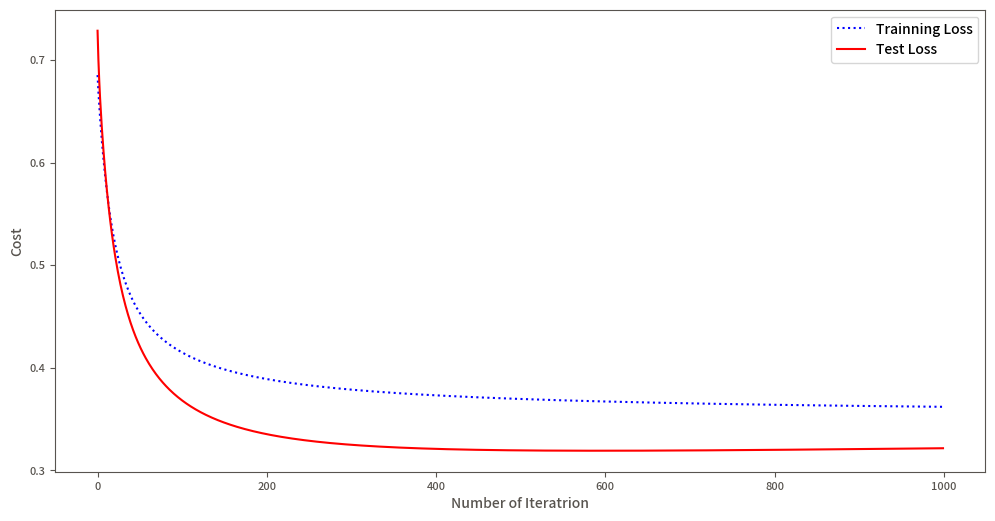

In [263]:

loss_history_test = np.zeros(iterations) # 训练集没有归一化
for i in range(iterations):
    loss_history_test[i] = loss_function(X_test,y_test,weight_history[i],bias_histoay[i])
index = np.arange(0,iterations,1)
plt.figure(figsize=(12,6), dpi=100)
plt.plot(index, loss_history, c='blue', linestyle='dotted',label='Trainning Loss')
plt.plot(index, loss_history_test, c='red', label='Test Loss')

plt.xlabel('Number of Iteratrion')
plt.ylabel('Cost')
plt.legend()
plt.show()

## 哑变量处理

In [265]:
data = pd.read_csv('./data/heart.csv')
a = pd.get_dummies(data['cp'],prefix='cp')
b = pd.get_dummies(data['thal'], prefix='thal')
c = pd.get_dummies(data['slope'], prefix='slope')
frames = [a,b,c,data]
data = pd.concat(frames,axis=1)
data = data.drop(columns=['cp','thal','slope'])
data.head()

,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,...,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target
0,False,False,False,True,False,True,False,False,True,False,...,1,145,233,1,0,150,0,2.3,0,1
1,False,False,True,False,False,False,True,False,True,False,...,1,130,250,0,1,187,0,3.5,0,1
2,False,True,False,False,False,False,True,False,False,False,...,0,130,204,0,0,172,0,1.4,0,1
3,False,True,False,False,False,False,True,False,False,False,...,1,120,236,0,1,178,0,0.8,0,1
4,True,False,False,False,False,False,True,False,False,False,...,0,120,354,0,1,163,1,0.6,0,1


In [301]:
X = data.iloc[:,:-1]
y = data['target'].values
y = y.reshape(-1,1)
print(f'特征集形状: {X.shape}')
print(f'标签集形状: {y.shape}')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

特征集形状: (303, 21)
标签集形状: (303, 1)


In [305]:
# 初始化参数
dimension = X.shape[1]
weight = np.full((dimension,1),0.1)
bias = 0
# 初始化超参数
alpha = 1 # 学习速率
iterations = 3000   # 迭代次数

In [306]:
loss_history, weight_history, bias_histoay = \
    logistic_regression(X_train, y_train, weight, bias, alpha, iterations)

 轮次  1  当前轮训练集损失 ： 0.6222467622787473
 轮次  2  当前轮训练集损失 ： 0.5679450127855463
 轮次  3  当前轮训练集损失 ： 0.5308013487322748
 轮次  4  当前轮训练集损失 ： 0.5043965878693714
 轮次  5  当前轮训练集损失 ： 0.4850272706593694
 轮次  6  当前轮训练集损失 ： 0.47040417019318226
 轮次  7  当前轮训练集损失 ： 0.4590781878636297
 轮次  8  当前轮训练集损失 ： 0.4501057746298244
 轮次  9  当前轮训练集损失 ： 0.4428548588411144
 轮次  10  当前轮训练集损失 ： 0.4368905967069161
 轮次  11  当前轮训练集损失 ： 0.4319064979082156
 轮次  12  当前轮训练集损失 ： 0.42768179348834606
 轮次  13  当前轮训练集损失 ： 0.42405434407808884
 轮次  14  当前轮训练集损失 ： 0.4209029883377424
 轮次  15  当前轮训练集损失 ： 0.41813577235349875
 轮次  16  当前轮训练集损失 ： 0.41568193167574335
 轮次  17  当前轮训练集损失 ： 0.41348632224634146
 轮次  18  当前轮训练集损失 ： 0.41150548295290085
 轮次  19  当前轮训练集损失 ： 0.4097048062978073
 轮次  20  当前轮训练集损失 ： 0.40805647500660996
 轮次  21  当前轮训练集损失 ： 0.4065379367021377
 轮次  22  当前轮训练集损失 ： 0.40513076223937955
 轮次  23  当前轮训练集损失 ： 0.40381978138700875
 轮次  24  当前轮训练集损失 ： 0.4025924215590717
 轮次  25  当前轮训练集损失 ： 0.40143819695604727
 轮次  26  当前轮训练集损失 ： 0.4

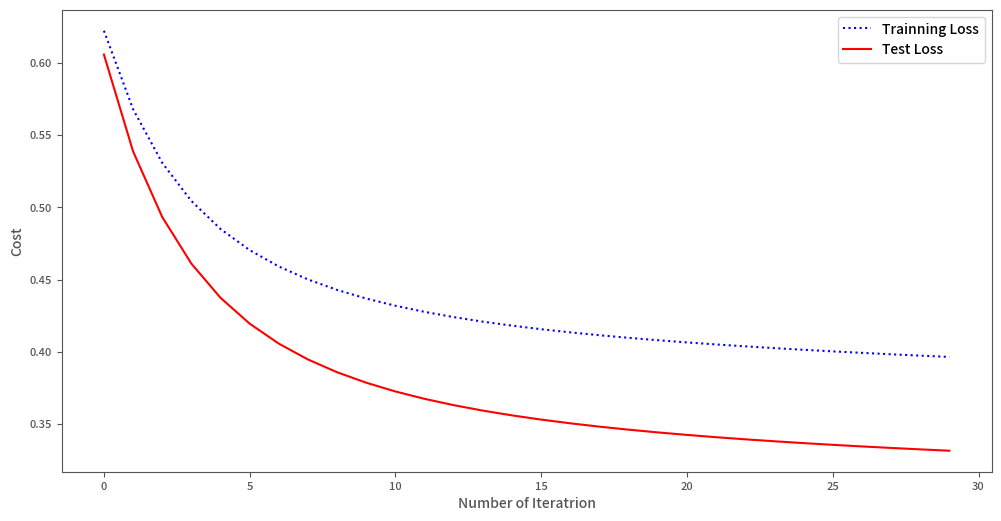

In [304]:

loss_history_test = np.zeros(iterations) # 训练集有归一化
for i in range(iterations):
    loss_history_test[i] = loss_function(X_test,y_test,weight_history[i],bias_histoay[i])
index = np.arange(0,iterations,1)
plt.figure(figsize=(12,6), dpi=100)
plt.plot(index, loss_history, c='blue', linestyle='dotted',label='Trainning Loss')
plt.plot(index, loss_history_test, c='red', label='Test Loss')

plt.xlabel('Number of Iteratrion')
plt.ylabel('Cost')
plt.legend()
plt.show()

### sklean实现

In [307]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test, y_test)

D:\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8852459016393442

In [308]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag', '